# EDA: Visa Dataset

### Dataset Link: https://drive.google.com/file/d/1Fzzbf8Rj1NheQ-zfwFQHYY-T8FxB8ouT/view

### 1. EDA
- Data Profiling
- Stastical analysis
- Graphical Analysis

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat
%matplotlib inline
# To display maximum columns of dataframe on screen
pd.pandas.set_option('display.max_columns', None)

##### load the dataset and display basic info like shape, data types, basic statistical info like mean median mode etc

In [3]:
visa=pd.read_csv('Visadataset.csv')
visa.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [4]:
#data types
visa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [6]:
#shape to display number of rows and columns
visa.shape

(25480, 12)

### Observation
- there are 25480 rows and 12 columns
- no_of_employees, yr_of_estab are numerical, prevailing_wage is float and rest are categorical features

### Separating Numerical and Categorial features

In [13]:
numeric_feat=[feats for feats in visa.columns if visa[feats].dtype!='O' and feats!='case_id']
categorical_feat=[feats for feats in visa.columns if visa[feats].dtype=='O' and feats!='case_id']

In [14]:
numeric_feat

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

In [15]:
categorical_feat

['continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

In [16]:
visa[numeric_feat].head()

,no_of_employees,yr_of_estab,prevailing_wage
0,14513,2007,592.2029
1,2412,2002,83425.6500
2,44444,2008,122996.8600
3,98,1897,83434.0300
4,1082,2005,149907.3900


### Numerical Features

#### Discrete Numerical features

In [19]:
discrete_numeric_feats=[feat for feat in numeric_feat if len(visa[feat].unique())<25]

In [20]:
discrete_numeric_feats

[]

#### Continuous Numerical Features

In [23]:
continuous_numeric_feats=[feat for feat in numeric_feat if len(visa[feat].unique())>25]
continuous_numeric_feats

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

### Categorical Features

In [25]:
visa[categorical_feat]

,continent,education_of_employee,has_job_experience,requires_job_training,region_of_employment,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,West,Hour,Y,Denied
1,Asia,Master's,Y,N,Northeast,Year,Y,Certified
2,Asia,Bachelor's,N,Y,West,Year,Y,Denied
3,Asia,Bachelor's,N,N,West,Year,Y,Denied
4,Africa,Master's,Y,N,South,Year,Y,Certified
...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,South,Year,Y,Certified
25476,Asia,High School,Y,N,Northeast,Year,Y,Certified
25477,Asia,Master's,Y,N,South,Year,N,Certified
25478,Asia,Master's,Y,Y,West,Year,Y,Certified


### Missing Values

In [26]:
missing_val=[feat for feat in visa.columns if visa[feat].isnull().sum()>1]

In [27]:
missing_val

[]

### Observation
- There is no missing value in the dataset

## Statistical Analysis

### Mean, Median, Mode of the numerical dataset

In [28]:
#Mean of the numeric features
visa[numeric_feat].mean()

no_of_employees     5667.043210
yr_of_estab         1979.409929
prevailing_wage    74455.814592
dtype: float64

In [30]:
#Median of the numeric features
visa[numeric_feat].median()

no_of_employees     2109.00
yr_of_estab         1997.00
prevailing_wage    70308.21
dtype: float64

In [33]:
#Mode of the numeric features
visa[numeric_feat].mode().loc[0]

no_of_employees     183.00
yr_of_estab        1998.00
prevailing_wage     100.66
Name: 0, dtype: float64

### Variance and Standard Deviation of the numerical dataset

In [35]:
#Variance
round(visa[numeric_feat].var(),2)

no_of_employees    5.233996e+08
yr_of_estab        1.794960e+03
prevailing_wage    2.789524e+09
dtype: float64

In [37]:
# Standard Deviation
visa[numeric_feat].std()

no_of_employees    22877.928848
yr_of_estab           42.366929
prevailing_wage    52815.942327
dtype: float64

### Covariance of numeric dataset

In [38]:
visa[numeric_feat].cov()

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,5.233996e+08,-17224.155003,-1.150624e+07
yr_of_estab,-1.722416e+04,1794.956681,2.761653e+04
prevailing_wage,-1.150624e+07,27616.530171,2.789524e+09


### Correlation of numeric dataset

In [41]:
#Pearson correlation coefficient
visa[numeric_feat].corr()

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


In [42]:
# 2. Spearman's rank correlation coefficient
visa[numeric_feat].corr(method='spearman')

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.006214,-0.015197
yr_of_estab,-0.006214,1.000000,0.019566
prevailing_wage,-0.015197,0.019566,1.000000


In [43]:
# 3. kendall rank correlation coefficient
visa[numeric_feat].corr(method='kendall')

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.004180,-0.010159
yr_of_estab,-0.004180,1.000000,0.013151
prevailing_wage,-0.010159,0.013151,1.000000


### Five point summary for outliers

In [46]:
for feat in numeric_feat:
     print("Five Point Summary for {}".format(feat))
     print("1. Minimum value is: {}".format(visa[feat].min()))
     print("2. 1st quartile is: {}".format(np.percentile(visa[feat], 25)))
     print("3. Median is: {}".format(np.percentile(visa[feat], 50)))
     print("4. 3rd quartile is: {}".format(np.percentile(visa[feat], 75)))
     print("5. Maximum value is: {}".format(visa[feat].max()))
     print(" ")

Five Point Summary for no_of_employees
1. Minimum value is: -26
2. 1st quartile is: 1022.0
3. Median is: 2109.0
4. 3rd quartile is: 3504.0
5. Maximum value is: 602069
 
Five Point Summary for yr_of_estab
1. Minimum value is: 1800
2. 1st quartile is: 1976.0
3. Median is: 1997.0
4. 3rd quartile is: 2005.0
5. Maximum value is: 2016
 
Five Point Summary for prevailing_wage
1. Minimum value is: 2.1367
2. 1st quartile is: 34015.479999999996
3. Median is: 70308.20999999999
4. 3rd quartile is: 107735.51250000001
5. Maximum value is: 319210.27
 


### Mode of Categorical Features

In [50]:
visa[categorical_feat].mode()

,continent,education_of_employee,has_job_experience,requires_job_training,region_of_employment,unit_of_wage,full_time_position,case_status
0,Asia,Bachelor's,Y,N,Northeast,Year,Y,Certified


## Graphical Analysis

### Box Plot for outliers

C:\Users\subho\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


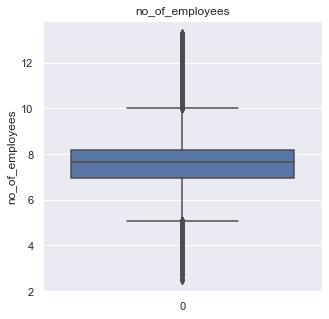

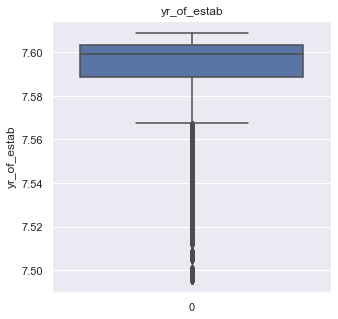

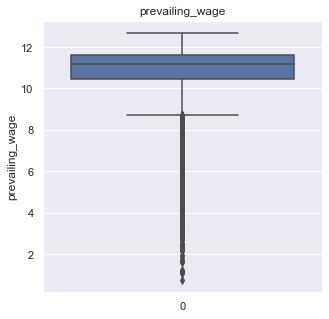

In [51]:
sns.set(rc={'figure.figsize':(5,5)})
for feat in continuous_numeric_feats:
    visa_copy=visa.copy()
    # here we are ignoring all zero values,since log(0) is undefined
    if 0 in visa_copy[feat].unique():
        pass
    else:
        visa_copy[feat]=np.log(visa_copy[feat])
        sns.boxplot(data=visa_copy[feat])
        plt.ylabel(feat)
        plt.title(feat)
        plt.show()

### Observation
- All continuous features contain outliers

C:\Users\subho\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


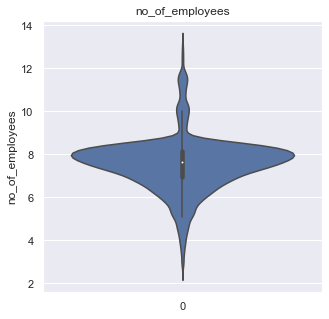

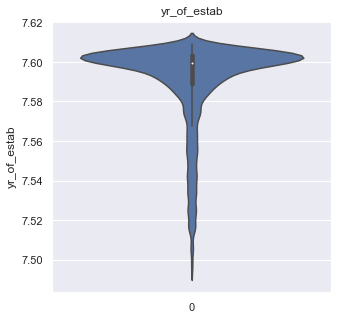

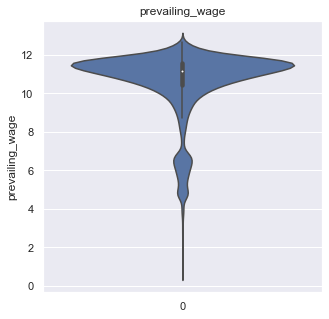

In [53]:
# violin plot for checking outliers
sns.set(rc={'figure.figsize':(5,5)})
for feat in continuous_numeric_feats:
    visa_copy=visa.copy()
    # here we are ignoring all zero values,since log(0) is undefined
    if 0 in visa_copy[feat].unique():
        pass
    else:
        visa_copy[feat]=np.log(visa_copy[feat])
        sns.violinplot(data=visa_copy[feat])
        plt.ylabel(feat)
        plt.title(feat)
        plt.show()

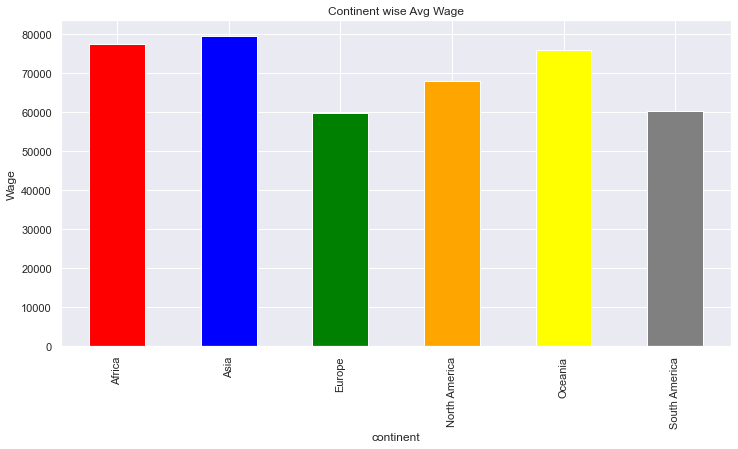

In [59]:
#continent wise mean salary
visa_copy=visa.copy()
visa_copy.groupby(by='continent')['prevailing_wage'].mean().plot.bar(figsize=(12,6),color=['red', 'blue', 'green', 'orange', 'yellow','grey','pink'])
plt.xlabel('continent')
plt.ylabel('Wage')
plt.title('Continent wise Avg Wage')
plt.show()

### Observation
- Asia has highest average wage followed by africa

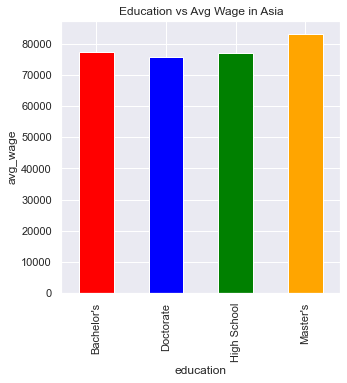

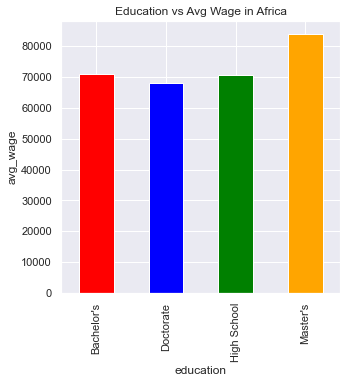

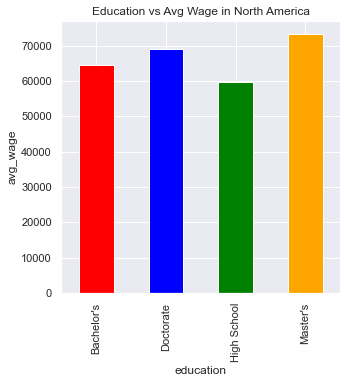

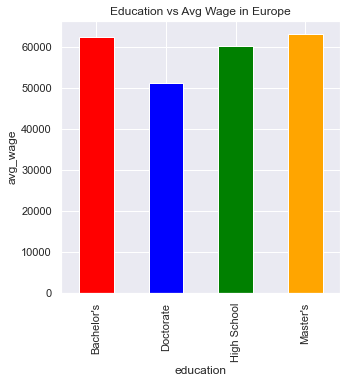

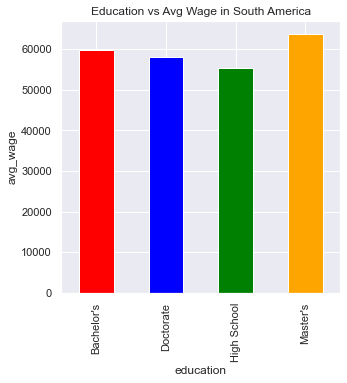

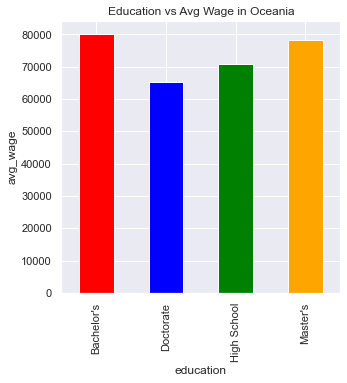

In [67]:
#education wise mean salary in each continents
visa_copy=visa.copy()
for continents in visa_copy['continent'].unique():
    visa_copy[visa_copy['continent']==continents].groupby(by='education_of_employee')['prevailing_wage'].mean().plot.bar(color=['red', 'blue', 'green', 'orange', 'yellow','grey','pink'])
    plt.xlabel('education')
    plt.ylabel('avg_wage')
    plt.title('Education vs Avg Wage in {}'.format(continents))
    plt.show()

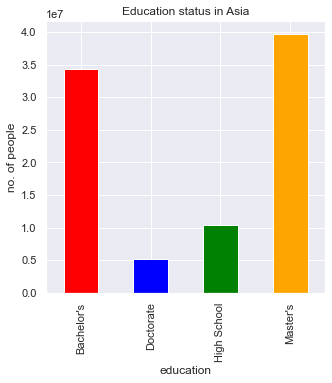

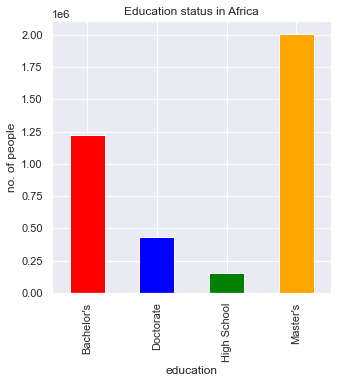

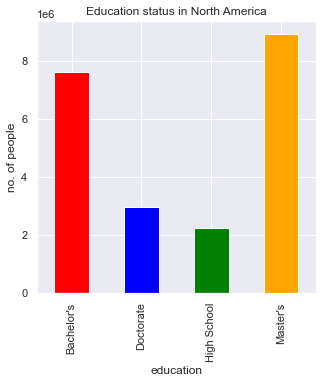

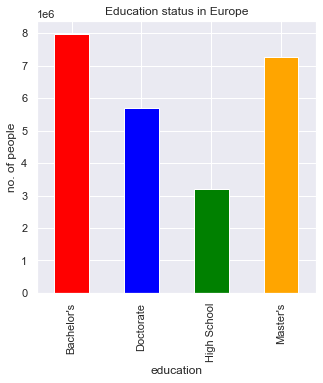

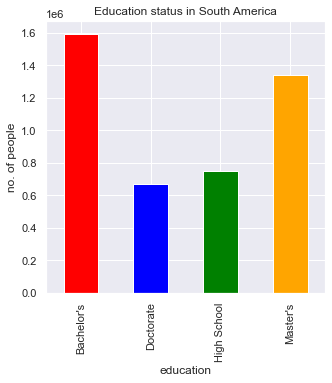

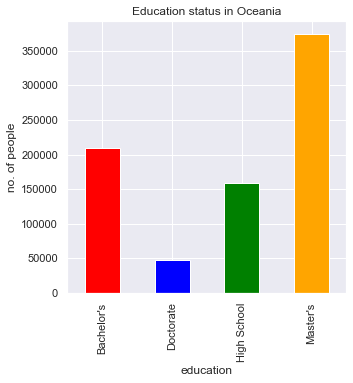

In [79]:
#Continent wise educaation of people
visa_copy=visa.copy()
for continents in visa_copy['continent'].unique():
    visa_copy[visa_copy['continent']==continents].groupby(by='education_of_employee').sum().iloc[:,0].plot.bar(color=['red', 'blue', 'green', 'orange', 'yellow','grey','pink'])
    plt.xlabel('education')
    plt.ylabel('no. of people')
    plt.title('Education status in {}'.format(continents))
    plt.show()

### Observation
- It seems Masters' is the most popular education across all continents in terms of salary

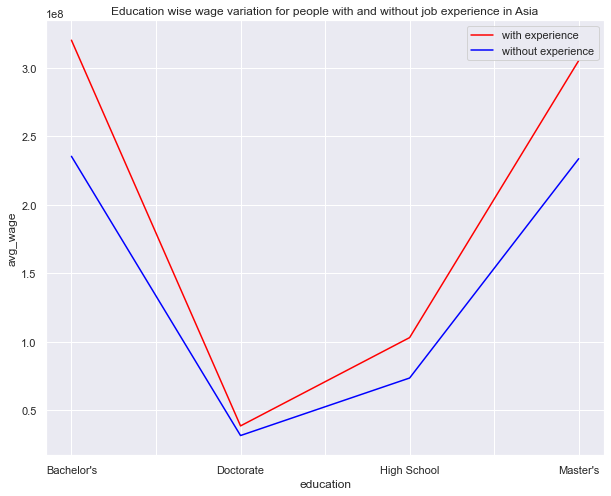

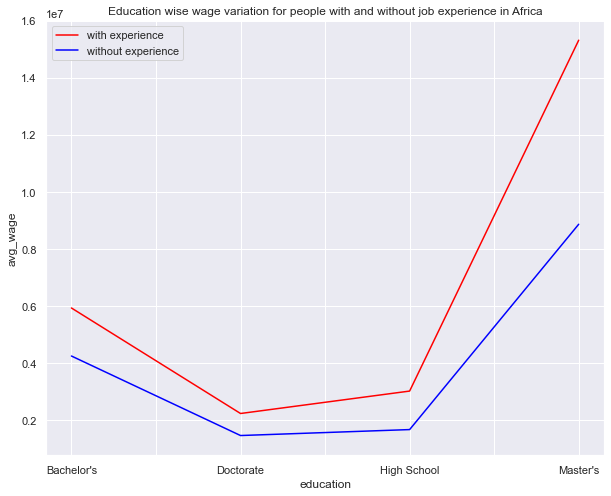

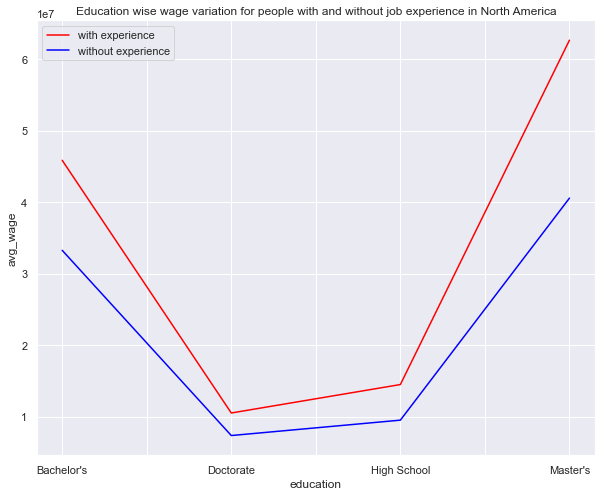

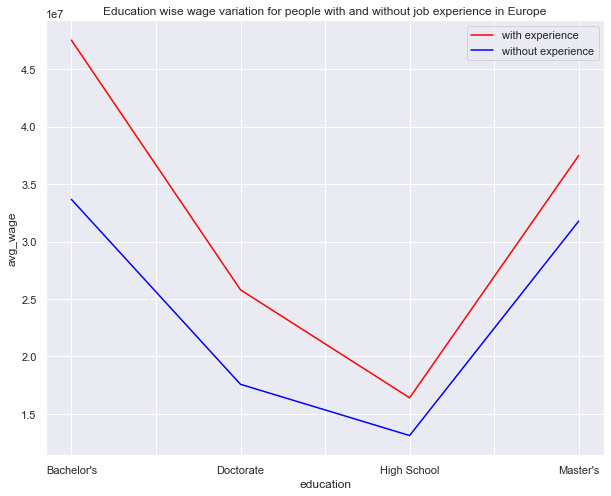

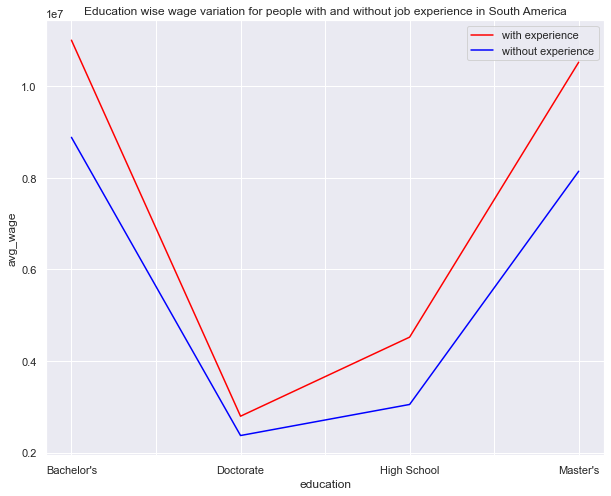

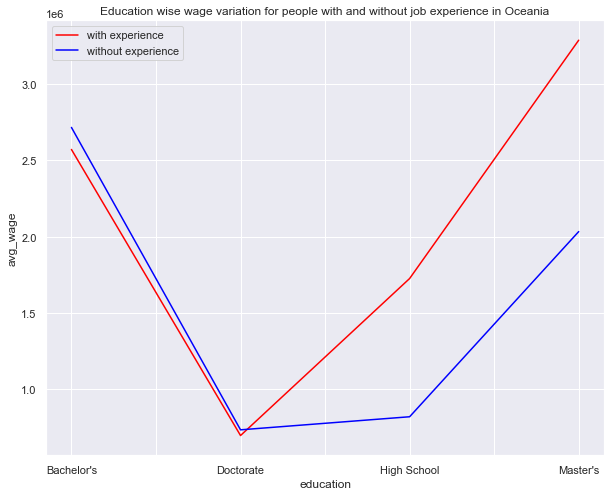

In [110]:
#Continent wise job experience vs Salary
#People having job experience
visa_copy=visa.copy()
for continents in visa_copy['continent'].unique():
    plt.figure(figsize=(10,8))
    visa_copy.loc[np.where((visa_copy['continent']==continents) & (visa_copy['has_job_experience']=='Y'))].groupby(by='education_of_employee').sum().iloc[:,2].plot(color=['red'],label='with experience')
    visa_copy.loc[np.where((visa_copy['continent']==continents) & (visa_copy['has_job_experience']=='N'))].groupby(by='education_of_employee').sum().iloc[:,2].plot(color=['blue'],label='without experience')
    plt.legend()
    plt.xlabel('education')
    plt.ylabel('avg_wage')
    plt.title('Education wise wage variation for people with and without job experience in {}'.format(continents))
    plt.show()

### Observation
- from the above graphical analysis it is evident that people having job experience get more wage than those who don't.

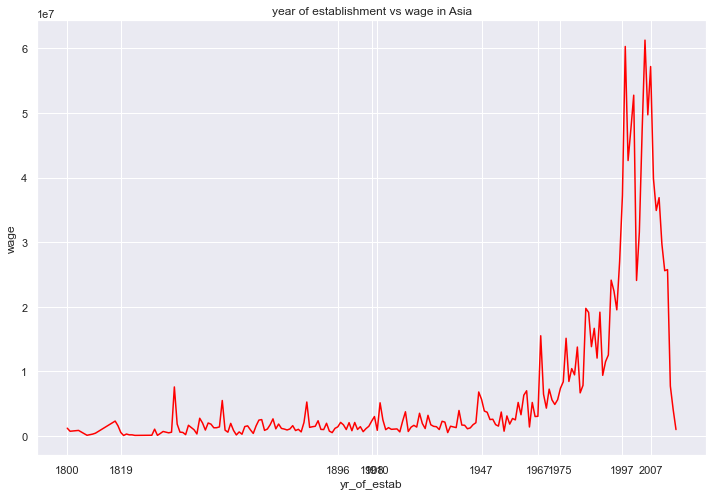

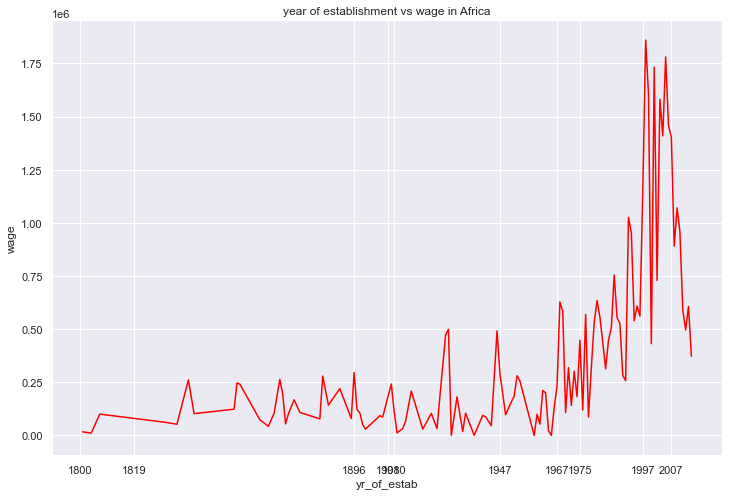

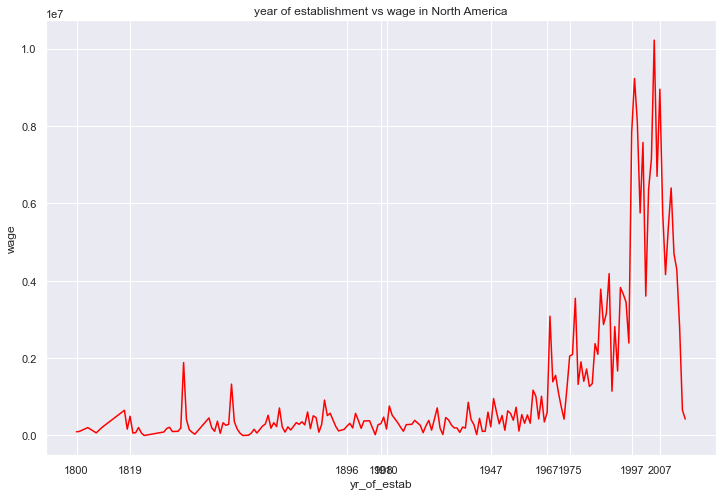

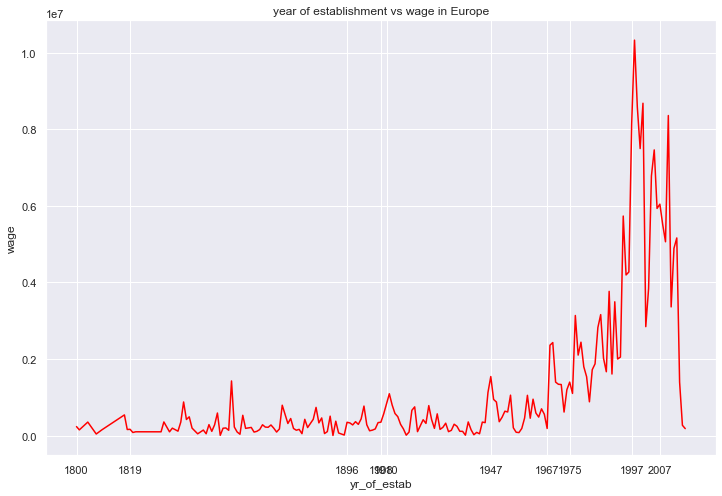

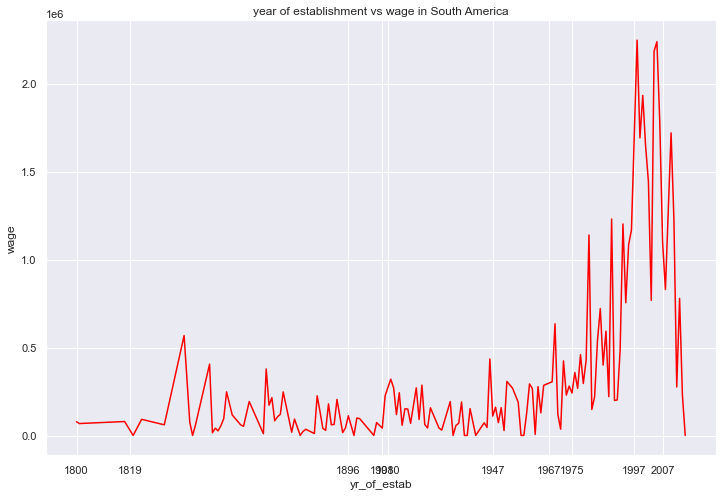

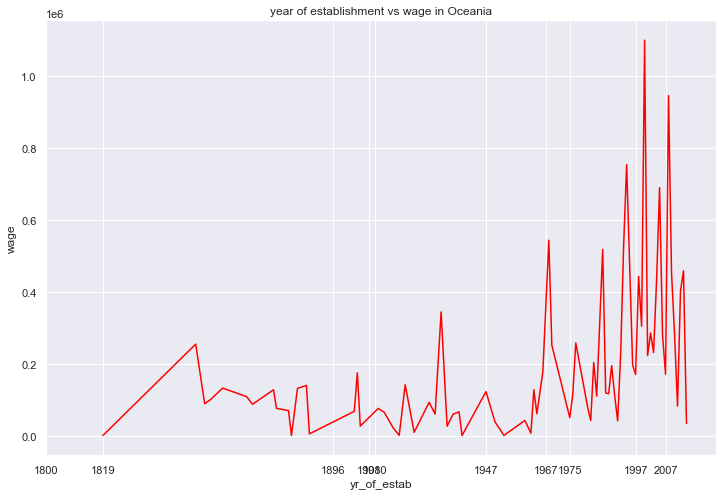

In [122]:
#year of establishment vs wage continent wise
visa_copy=visa.copy()
for continents in visa_copy['continent'].unique():
    visa_copy[visa_copy['continent']==continents].groupby(by='yr_of_estab').sum()['prevailing_wage'].plot(figsize=(12,8), color=['red'])
    plt.xticks(visa_copy['yr_of_estab'].unique()[::20])
    plt.xlabel('yr_of_estab')
    plt.ylabel('wage')
    plt.title('year of establishment vs wage in {}'.format(continents))
    plt.show()

### Observation
- From the above graphical analysis it is evident that wage was highest during around 2007 and then there is a decline

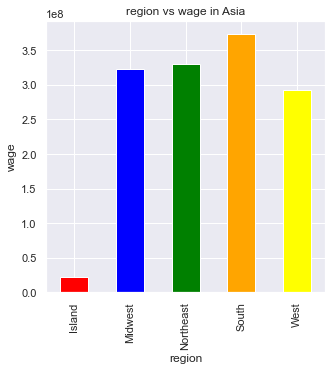

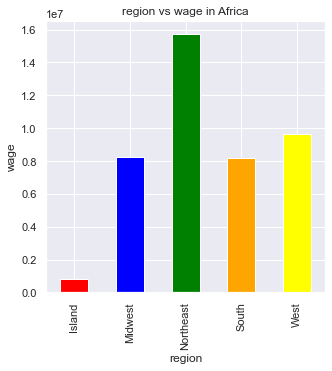

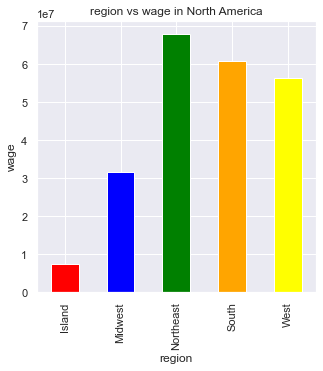

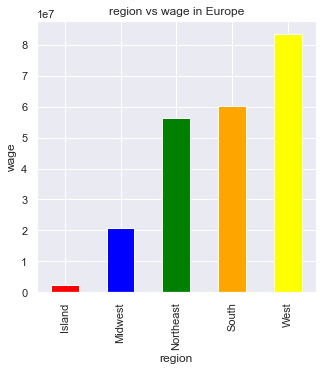

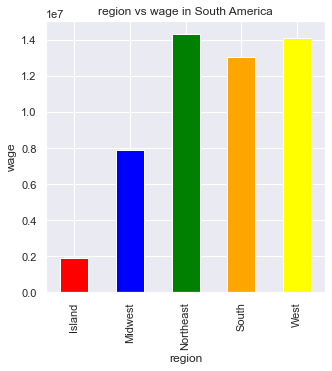

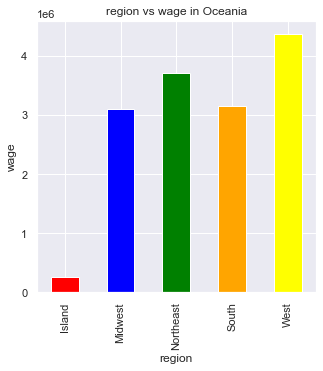

In [125]:
#region wise salary variation in each continents
visa_copy=visa.copy()
for continents in visa_copy['continent'].unique():
    visa_copy[visa_copy['continent']==continents].groupby(by='region_of_employment').sum()['prevailing_wage'].plot.bar(color=['red', 'blue', 'green', 'orange', 'yellow','grey','pink'])
    plt.xlabel('region')
    plt.ylabel('wage')
    plt.title('region vs wage in {}'.format(continents))
    plt.show()

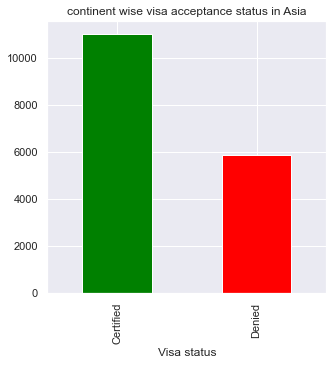

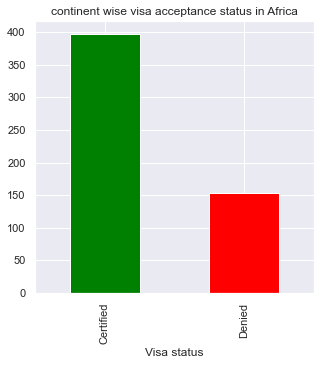

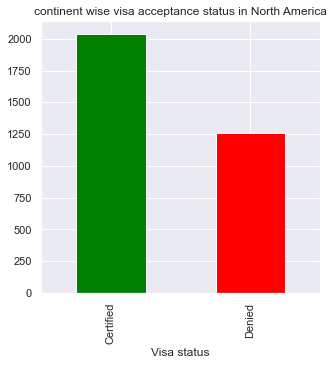

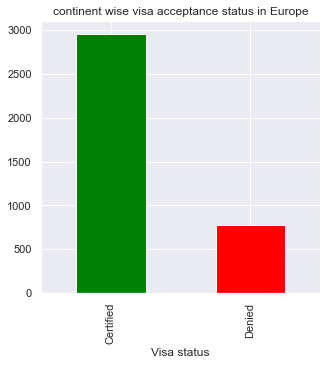

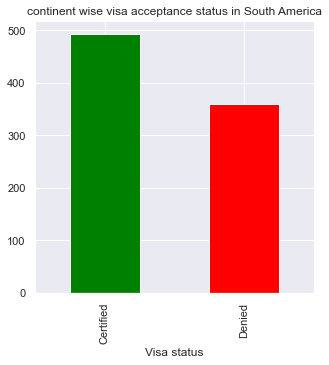

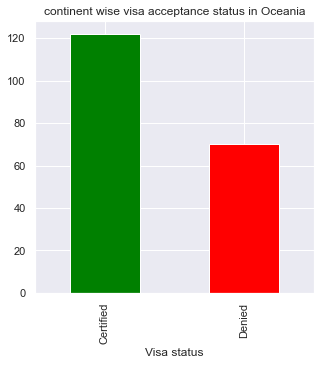

In [131]:
#continent wise visa acceptance status
visa_copy=visa.copy()
for continents in visa_copy['continent'].unique():
    visa_copy[visa_copy['continent']==continents].value_counts('case_status').plot.bar(color=['green', 'red'])
    plt.xlabel('Visa status')
    plt.title('continent wise visa acceptance status in {}'.format(continents))
    plt.show()

### Observation
- Europe has highest acceptance rate
- South America has lowest acceptance rate

In [173]:
#encoding the 'case_status' and 'has_job_experience' features for better analysis
visa_copy['case_status_new']=visa_copy['case_status'].apply(lambda x: 0 if x=='Denied' else 1)
visa_copy['has_job_experience_new']=visa_copy['has_job_experience'].apply(lambda x: 0 if x=='N' else 1)

In [195]:
visa_copy.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,case_status_new,has_job_experience_new
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,0,0
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,1,1
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0,0
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0,0
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,1,1


In [207]:
#grouping the data by continents, education and job experience to analyse visa acceptance
visa_acceptance=visa_copy.groupby(by=['continent','education_of_employee']).sum()
visa_acceptance.head()

no_of_employees  yr_of_estab  \
continent education_of_employee                                 
Africa    Bachelor's                     1219325       282763   
          Doctorate                       436448       106362   
          High School                     151351       130356   
          Master's                       2004767       570045   
Asia      Bachelor's                    34272894     14198534   

                                 prevailing_wage  case_status_new  \
continent education_of_employee                                     
Africa    Bachelor's                1.015771e+07               81   
          Doctorate                 3.668420e+06               43   
          High School               4.664011e+06               23   
          Master's                  2.417154e+07              250   
Asia      Bachelor's                5.556157e+08             4407   

                                 has_job_experience_new  
continent education_of_employee                          
Africa    Bachelor's                                 79  
          Doctorate                                  32  
          High School                                41  
          Master's                                  182  
Asia      Bachelor's                               4135

In [211]:
visa_acceptance.rename(columns={'case_status_new':'accepted','has_job_experience_new':'has_job_experience'},inplace=True)

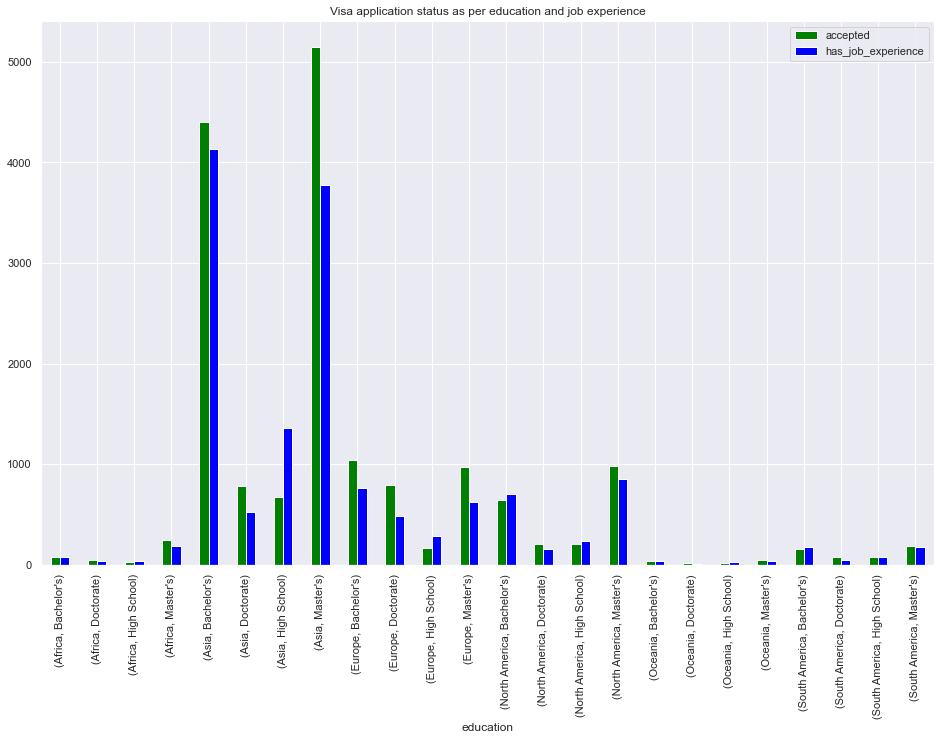

In [214]:
#plotting the visa application status as per education and job experience across continents
visa_acceptance.iloc[:,3:].plot.bar(color=['green', 'blue'],figsize=(16,10))
plt.xlabel('education')
plt.title('Visa application status as per education and job experience')
plt.show()

### Observation
- It is quite evident from the above graphical analysis that people having job experience have upperhand in visa acceptance across all continents

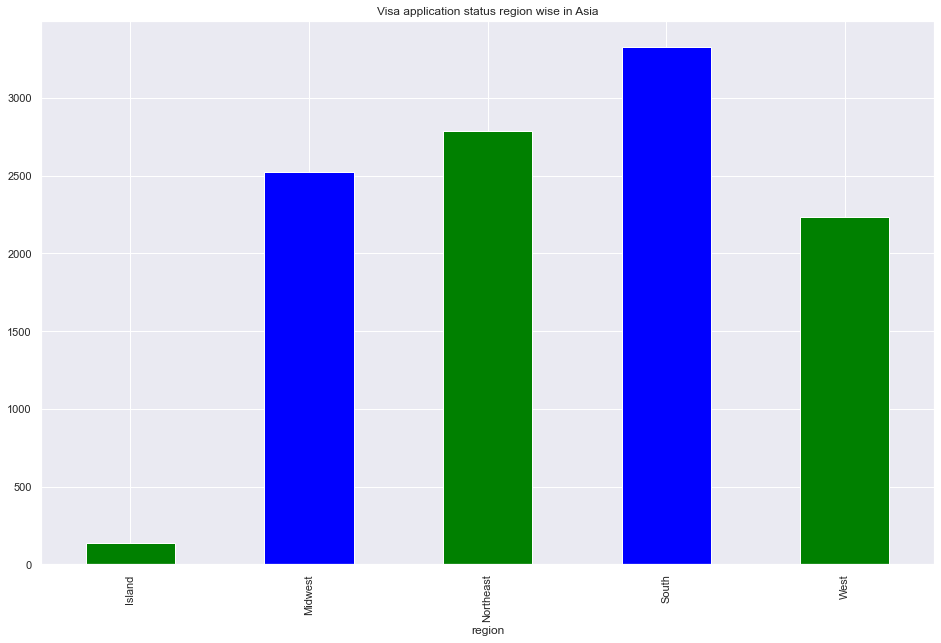

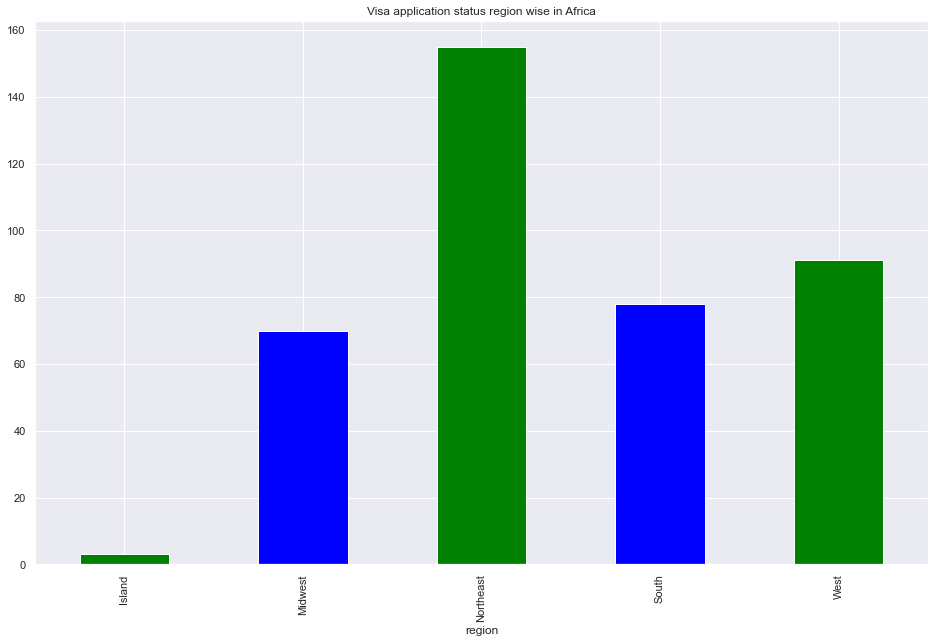

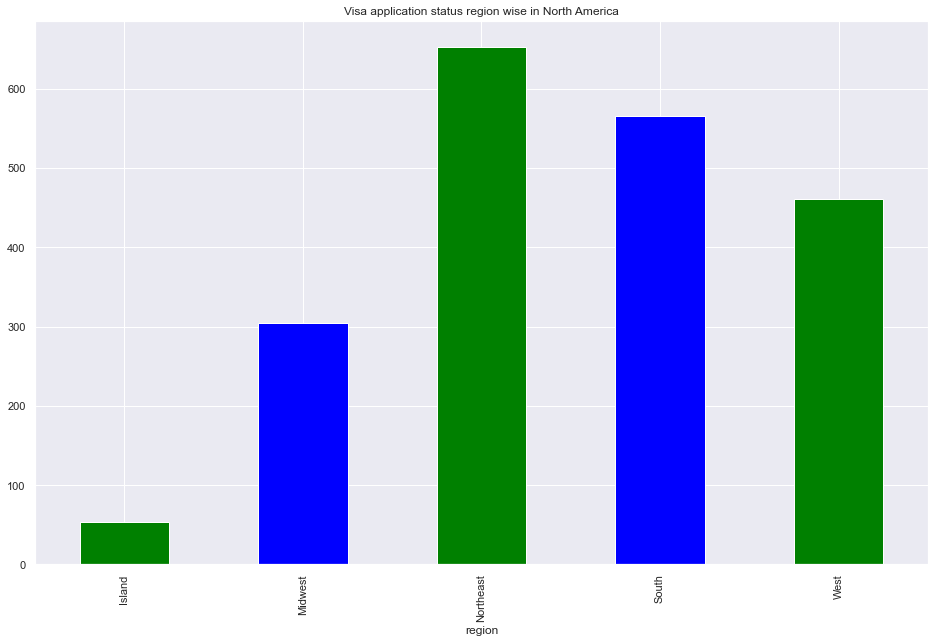

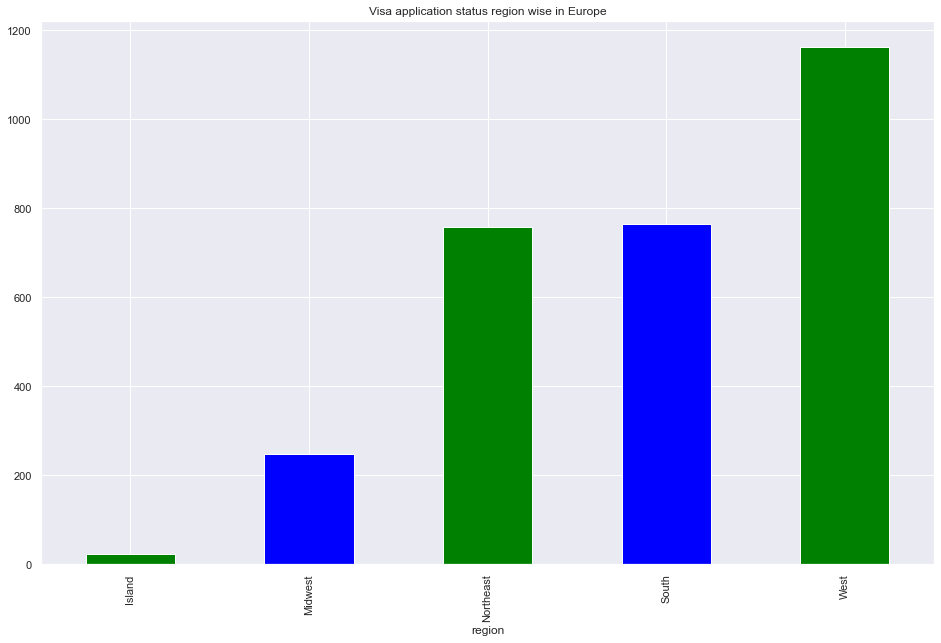

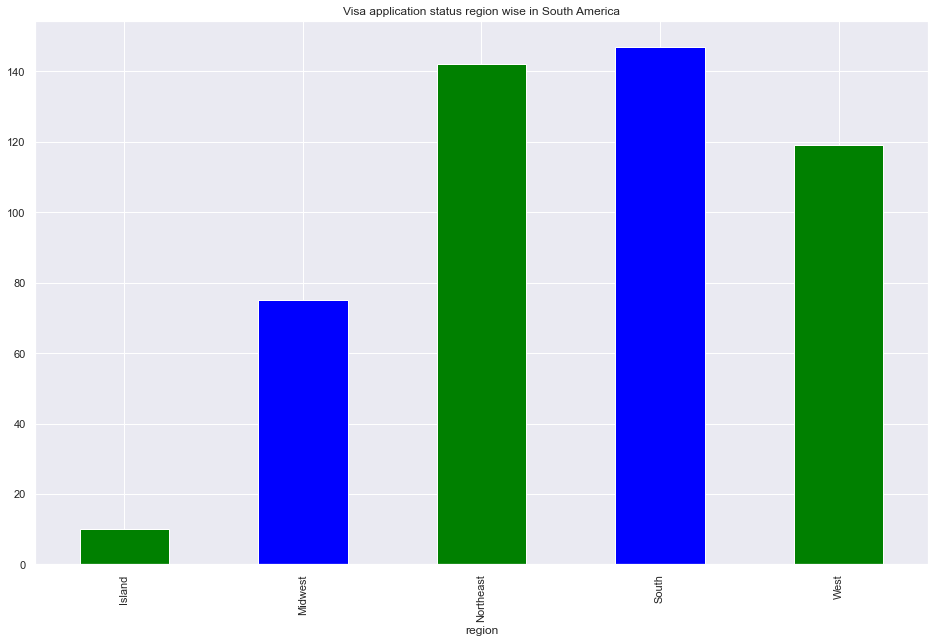

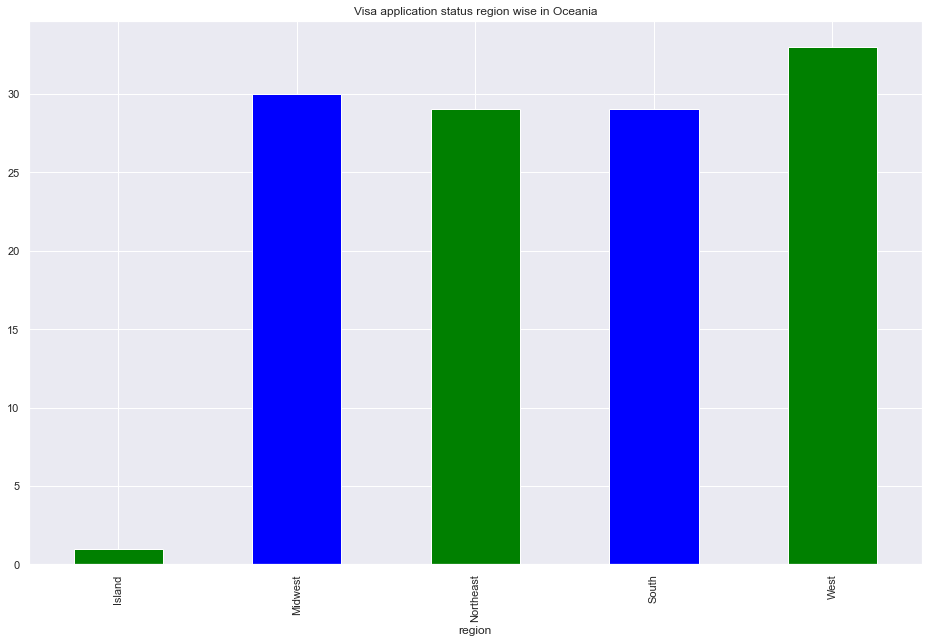

In [233]:
#region wise visa application status
visa_copy=visa.copy()
for continents in visa_copy['continent'].unique():
    visa_copy[visa_copy['continent']==continents].groupby(by='region_of_employment').sum().iloc[:,3].plot.bar(color=['green', 'blue'],figsize=(16,10))
    plt.xlabel('region')
    plt.title('Visa application status region wise in {}'.format(continents))
    plt.show()